In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

from keras.models import Sequential
from keras.layers import Dense

In [2]:
# 데이터 입력
iris = load_iris()
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [4]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values
Y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

훈련 => 실제제 학습용<br>
검증 -> 옵션(데이터가가 심플하거나 다른 이유 등) / 학습 검증 : 학습과정에서 중간 중간 체크<br>
=> 학습과정에서 쓰임<br>
<B>시험(Test)</B> -> 새로운 데이터


In [10]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, 
                                                    test_size = 0.2, 
                                                    random_state = 1)

In [11]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [14]:
#모델 구성하기
model = Sequential()
model.add(Dense(64, input_shape=(4,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

#모델의 학습과정 설정하기
model.compile(loss='categorical_crossentropy',
              optimizer='sgd', metrics=['accuracy']) #sgd : 확률적경사하강법

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [16]:
#모델 학습시키기
history = model.fit(x_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 6ms/step - loss: 1.1568 - accuracy: 0.2333
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0109 - accuracy: 0.3667
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9481 - accuracy: 0.5500
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8996 - accuracy: 0.6417
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8626 - accuracy: 0.7000
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8252 - accuracy: 0.6917
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7929 - accuracy: 0.9333
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7640 - accuracy: 0.6917
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7333 - accuracy: 0.7500
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7092 - accuracy: 0.7417
Epoch 11/100
4/4 [===========

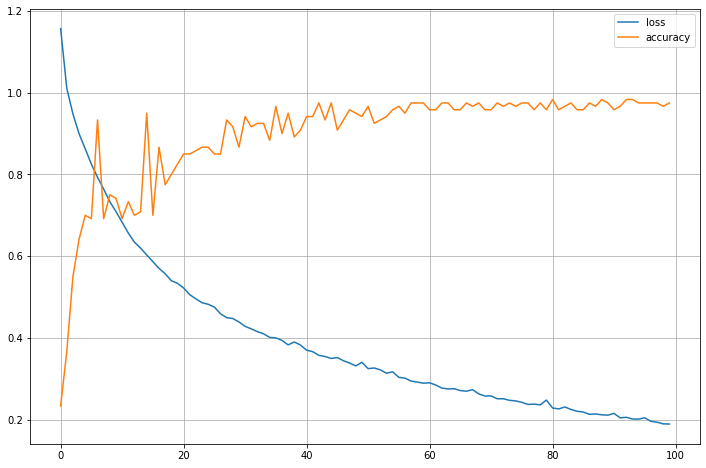

In [20]:
#학습과정 살펴보기
plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.legend(['loss', 'accuracy'])
plt.grid()
plt.show()

In [25]:
#모델 평가하기
loss, accuracy = model.evaluate(x_test, y_test)
print("Accuracy = {:.2f}".format(accuracy))
print("Loss = {:.2f}".format(loss))

1/1 [==============================] - 0s 16ms/step - loss: 0.2630 - accuracy: 0.9333
Accuracy = 0.93
Loss = 0.26


In [28]:
import numpy as np
test = np.array([[7, 3.0, 5, 1.4]])
p = model.predict(test)
p

array([[0.01103931, 0.771506  , 0.21745469]], dtype=float32)

In [29]:
l1 = model.layers[0]
l2 = model.layers[1]


In [30]:
#첫번째 레이어 가중치
w1 = l1.get_weights()
w1[0].shape, w1[1].shape

((4, 64), (64,))

In [31]:
w1[0]

array([[-7.37000257e-02,  6.83092028e-02, -1.72667027e-01,
        -8.15160275e-02,  2.90334702e-01, -1.98479742e-01,
        -5.53534962e-02, -1.61235690e-01,  1.97974682e-01,
         7.61987865e-02, -7.82053769e-02, -2.50227213e-01,
         3.01143795e-01, -2.85791755e-01, -2.28989393e-01,
         1.78460717e-01, -4.53982912e-02, -1.15464538e-01,
        -2.08440706e-01,  1.05417669e-02,  1.43709615e-01,
        -1.63867176e-01,  2.35198021e-01, -1.19812265e-02,
         1.53528899e-01, -1.27927989e-01,  8.48547593e-02,
         3.57363224e-02,  2.26144746e-01, -2.14104280e-01,
         6.31415471e-02, -1.54424489e-01,  3.66651833e-01,
         1.30065680e-01, -1.69269949e-01, -9.75804403e-02,
        -1.19119868e-01,  2.29361653e-03,  1.40689775e-01,
        -2.61953771e-02, -6.31212294e-02, -2.64972121e-01,
         1.06755726e-01, -8.57876092e-02,  3.94366592e-01,
         2.45565534e-01,  2.58348398e-02,  2.87753582e-01,
        -1.49597526e-01, -2.20749944e-01,  2.41656557e-0

In [35]:
#모델을을 파일로 저장
model.save('/gdrive/MyDrive/Colab Notebooks/인공지능/9주차/iris.model.h5')